## Obtendo os Dados:
Primeiramente, serão importados para o python os dados que iremos utilizar na análise. Os dados representam os retornos de 5 ações diferentes da bolsa, a partir do começo de 2015 até o dia 16 de setembro de 2020. Todos podem ser obtidos no site Yahoo Finanças, ao se pesquisar por uma ação e ir para a aba "Dados Históricos".

In [1]:
#Importa as Libraries que iremos usar:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt

# Instalando biblioteca que importa dados diretamente do Yahoo Finance
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

     |████████████████████████████████| 5.5MB 5.3MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=9d50f3c5b34fa85640c69c06b09212243c4b34cb2ec833d3851c4af7a495a01d
  Stored in directory: /tmp/pip-ephem-wheel-cache-ixov84ta/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
# Escolhendo as ações que iremos importar (observe que para isso digita-se o código da ação e '.SA')
tickers = ['WEGE3.SA','MRFG3.SA','FLRY3.SA','BBAS3.SA','BBDC4.SA']

In [3]:
# Aplica-se a biblioteca pandas_datareader, importada para o jupyter como 'web' para pegar dados do yahoo
# e insere os dados dentro da variável 'carteira'.
carteira= web.get_data_yahoo(tickers)

#Mostra as 5 primeiras linhas de dados do arquivo contido na variável carteira:
carteira.head()

[*********************100%***********************]  5 of 5 completed


Adj Close                    ...   Volume                   
            BBAS3.SA BBDC4.SA FLRY3.SA  ... FLRY3.SA MRFG3.SA  WEGE3.SA
Date                                    ...                            
2000-01-03  1.479128      NaN      NaN  ...      NaN      NaN  189280.0
2000-01-04  1.408780      NaN      NaN  ...      NaN      NaN   23660.0
2000-01-05  1.423212      NaN      NaN  ...      NaN      NaN       0.0
2000-01-06  1.443056      NaN      NaN  ...      NaN      NaN  125060.0
2000-01-07  1.410587      NaN      NaN  ...      NaN      NaN   67600.0

[5 rows x 30 columns]

In [4]:
# Calcula-se os retornos aplicando 'pct_change()' a coluna 'Close' da nossa tabela
carteira = carteira[{'Close'}].pct_change()

In [5]:
# Seleciona-se dados apenas a partir de 2015
carteira = carteira['2015':]

# Mudando o nome da coluna para 'Returns'
carteira = carteira.rename(columns={'Close':'Returns'})

In [6]:
# Renomeando os nomes das colunas de nossa tabela
retornos = carteira['Returns'].rename(columns={'BBAS3.SA':'BBAS3',
                                              'BBDC4.SA':'BBDC4', 
                                              'FLRY3.SA':'FLRY3',
                                              'MRFG3.SA':'MRFG3', 
                                              'WEGE3.SA':'WEGE3'})

In [7]:
#Mostra as 5 primeiras linhas de dados do arquivo contido na variável carteira:
retornos.head()

,BBAS3,BBDC4,FLRY3,MRFG3,WEGE3
Date,,,,,
2015-01-02,-0.047118,-0.021676,-0.017199,-0.073650,0.009837
2015-01-05,-0.020751,0.001458,-0.041875,-0.075972,0.006812
2015-01-06,0.013977,0.032898,-0.014351,-0.015296,-0.014832
2015-01-07,0.044020,0.039737,-0.007280,0.034951,-0.011455
2015-01-08,0.003407,0.005154,-0.013333,0.018762,0.016883


## Visualizando os Dados:
Antes de partir para a análise quantitativa, faremos uma análise visual:

In [8]:
#Um truque de matemática financeira: 
#Multiplicamos 1 mais os retornos, cumulativamente para cada dia que passa, em todas as colunas de dados.
#Dessa forma, conseguimos descobrir qual seria o valor final de um investimento feito no ínicio do período.
(1+retornos).cumprod()

,BBAS3,BBDC4,FLRY3,MRFG3,WEGE3
Date,,,,,
2015-01-02,0.952882,0.978324,0.982801,0.926350,1.009837
2015-01-05,0.933109,0.979751,0.941646,0.855974,1.016717
2015-01-06,0.946151,1.011983,0.928133,0.842881,1.001637
2015-01-07,0.987800,1.052197,0.921376,0.872340,0.990163
2015-01-08,0.991165,1.057619,0.909091,0.888707,1.006879
...,...,...,...,...,...
2020-10-19,1.287337,1.126697,3.416462,2.474632,6.995260
2020-10-20,1.346655,1.175351,3.452088,2.504092,7.122277
2020-10-21,1.356752,1.187378,3.452088,2.484452,6.683261


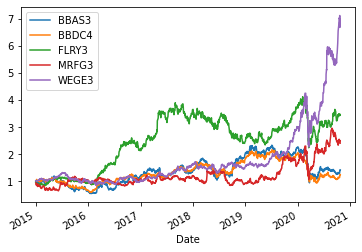

In [9]:
#Podemos representar o cálculo anterior em um gráfico, colocando um .plot() ao final da operação:
(1+retornos).cumprod().plot()

## Diversificação e Risco
Antes de entender a diversificação, é importante entender que existem dois tipos de riscos em uma ação, o risco sistêmico e o risco específico:

**Risco Sistêmico:** É o risco que afeta todas as empresas simultaneamente. Podem ser riscos econômicos, como grandes *crashes* e depressões, riscos políticos, como guerras, pode ser o risco de uma pandemia, como a do COVID-19. A principal característica deste tipo de risco é que ele irá afetar negativamente praticamente todos os ativos ao mesmo tempo.

**Risco Específico:** É o risco que afeta apenas uma empresa ou setor por vez. Para empresas de petróleo, esse risco pode ser o da diminuição do preço do barril de petróleo, para empresas importadoras pode ser o aumento do dólar. Apesar de esses fatores afetarem negativamente algumas empresas, podem afetar positivamente outras. Por exemplo, a queda no preço do petróleo pode beneficiar empresas de aviação, pois o combustível ficará mais barato, e o aumento do dólar pode afetar positivamente empresas que exportam seus produtos.


Ao montar uma carteira de com ações diferentes entre si, que seja diversificada, conseguimos diminuir os riscos específicos que incidem sobre ela, fazendo com que ela seja exposta apenas ao risco sistêmico. A exposição de uma carteira aos riscos específicos, de acordo com o número de ações que ela possui, costuma ser o seguinte:


## Correlação
Para sabermos se as ações que estamos colocando em nossas carteiras são diferentes entre si, usamos uma medida chamada de *correlação*. Ela representa quanto duas variáveis se relacionam entre si, e pode variar de -1 a 1.

- Uma correlação positiva próxima de 1 significa que as duas varávies se movimentam na mesma direção e praticamente na mesma magnitude. Se uma delas sobe 1%, a outra também sobe 1%.

- Uma correlação negativa próxima de -1 significa que as duas varávies se movimentam em direções opostas e praticamente na mesma magnitude. Se uma delas sobe 1%, a outra cai 1%.

- Uma correlação próxima de 0 signifca que as duas variáveis se movimentam de forma independente entre si.

Observe o gráfico dos retornos das ações:

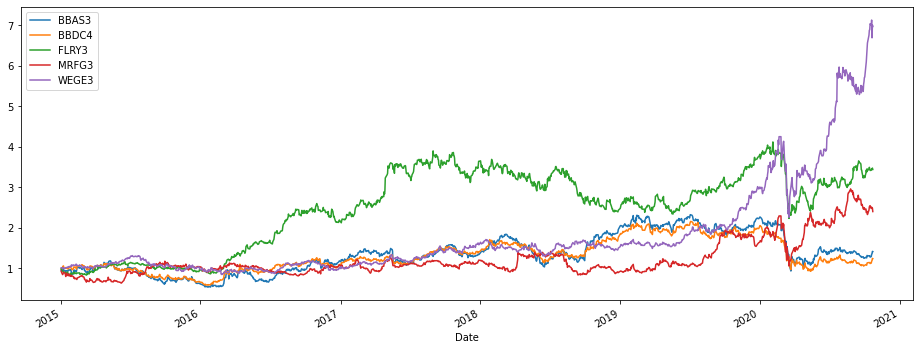

In [10]:
#É possível mudar o tamanho do gráfico, para faciltiar a visualização.
#Para isso, dentro do comando plot, alteramos o parâmetro figsize, selecionando um tamanho para os eixos x e y:
(1+retornos).cumprod().plot(figsize = (16,6))

É possível perceber, visualizando o gráfico, que praticamente todas as ações selecionadas se movimentam de forma independente entre si a maior parte do tempo. Porém, olhando detalhadamente a linha vermelha e a roxa, podemos perceber que elas se movimentaram juntas desde 2015 até atualmente. Sem saber a quais empresas elas se referem, seria possível predizer que elas são muito similares entre si, provavelmente do mesmo setor. Pois bem, elas são as ações do **Banco do Brasil** (BBAS3) e do **Bradesco** (BBDC4). 

Outra forma de visualizar a correlação, e mais efetiva, é por meio de uma tabela de correlação, que pode ser feita da seguinte forma:

In [11]:
retornos.corr()

,BBAS3,BBDC4,FLRY3,MRFG3,WEGE3
BBAS3,1.000000,0.799619,0.413457,0.329610,0.368899
BBDC4,0.799619,1.000000,0.401387,0.313507,0.391533
FLRY3,0.413457,0.401387,1.000000,0.290342,0.305991
MRFG3,0.329610,0.313507,0.290342,1.000000,0.306944
WEGE3,0.368899,0.391533,0.305991,0.306944,1.000000


Observando a tabela de correlação, é possível perceber que a maioria das ações possui uma correlação de baixa a moderada com as outras, de 0,24 a 0,40. Ao olharmos a correlação entre BBAS3 e BBDC4, porém, encontramos uma correlação muito alta, de 0,79. Se quisermos montar um portofio diversificado, precisamos escolher empresas diferentes entre si, expostas a riscos diferentes, com baixa correlação.

## Risco e Retorno de Portfólios
Com o objetivo de simplificar a explicação, será feita a análise de uma carteira com ações de apenas duas empresas: **Fleury** (FLRY3), do setor de saúde, e **WEG** (WEGE3), do setor de eletricidade e equipamentos elétricos.

In [12]:
#Queremos apenas uma parte específica do DataFrame "Retornos". Para isso, colocamos o que queremos entre colchetes.
ações = retornos[["FLRY3", "WEGE3"]]
#Note que, como queremos uma lista com duas ações diferentes, elas também precisam estar entre colchetes.
#Caso queiramos apenas os dados da FLRY3, usamos: ações = retornos["FLRY3"]

ações.head()

,FLRY3,WEGE3
Date,,
2015-01-02,-0.017199,0.009837
2015-01-05,-0.041875,0.006812
2015-01-06,-0.014351,-0.014832
2015-01-07,-0.007280,-0.011455
2015-01-08,-0.013333,0.016883


Para obtermos o retorno total de uma carteira, precisamos do retorno anualizado das ações que a compõe e do peso de cada uma delas na carteira:

In [13]:
#Obter o retorno anualizado das ações. ações.shape[0] representa a quantidade de dados no DataFrame.
#252 é a quantidade de dias úteis em um ano.
retornos_ann = (1 + ações).prod()**(252/ações.shape[0]) - 1
retornos_ann

FLRY3    0.239925
WEGE3    0.402383
dtype: float64

In [14]:
#Obter a volatilidade anualizada das ações. 
vol_ann = ações.std()*(252**0.5)
vol_ann

FLRY3    0.334375
WEGE3    0.350275
dtype: float64

In [15]:
#Obtém um Array, tipo de conjunto de dados, com peso igual a 50% para cada ação. 
#Um Array é muito utíl para criar matrizes e fazer operações com elas.
pesos = np.array([0.50, 0.50])

In [16]:
#Obtém o retorno de cada ação ponderado pelo peso da mesma.
retornos_ann * pesos

FLRY3    0.119963
WEGE3    0.201192
dtype: float64

In [17]:
#Obtém o retorno total da carteira, ponderado pelo peso. O .sum() representa a soma dos resultados da primeira conta.
(retornos_ann * pesos).sum()

0.321154279888485

Experimente definir diferentes pesos para ver qual seria o retorno total da carteira!

Iremos agora criar uma função para calcular o retorno de um portfolio:

In [18]:
#Define uma função que retorna a multiplicação entre duas matrizes, calculando o retorno da carteira:
def portfolio_return(pesos, retornos_ann):
    """
    A partir dos pesos e dos retornos anualizados, calcula o retorno anualizado total de um portfolio.
    Pesos é uma matriz Nx1 e retornos é uma matriz Nx1. Ambas serão multiplicadas.
    """
    return pesos.T @ retornos_ann

In [19]:
portfolio_return(pesos, retornos_ann)

0.321154279888485

A volatilidade, ou desvio padrão, de um portfólio de ações pode ser calculado da seguinte forma:
<br>
<br>
<br>
$$ Volatilidade \, da \, Carteira \,= \sqrt{w_{1}^2\sigma_{1}^2+w_{2}^2\sigma_{2}^2+2w_{1}w_{2}Cov_{1,2}} $$
<br>
- $ w_{1} $ e $ w_{2} $ são os pesos de cada ação.
- $ \sigma_{1} $ e $ \sigma_{2} $ são os desvios padrões de cada ação.
- $ Cov_{1,2} $ é a covariância entre as duas ações.

A covarância é uma medida muito similar à correlação. É necessário usá-la no cálculo pois se duas ações em uma carteira não variam conjuntamente, por causa dos mesmos fatores, o risco da carteira será menor. É possível também usar um método de multiplicação de matrizes para obter o mesmo valor de forma mais simples, da seguinte forma:

In [20]:
#Define uma função que retorna a raiz da multiplicação entre três matrizes, calculando a volatilidade da carteira:
def portfolio_vol(pesos, matcovs):
    """
    A partir dos pesos e de uma matriz de covariância, calcula a volatilidade total de um portfolio.
    Pesos é uma matriz Nx1 e matcovs é uma matriz NxN. Ambas serão multiplicadas.
    """
    return (pesos.T @ matcovs @ pesos)**0.5

In [21]:
#Obtém a matriz de covariância entre as ações:
matcovs = ações.cov()
matcovs

,FLRY3,WEGE3
FLRY3,0.000444,0.000142
WEGE3,0.000142,0.000487


In [22]:
#Obtém a volatilidade anualizada do portfólio
portfolio_vol(pesos, matcovs)*(252**0.5)

0.27666610902747063

Note que as volatilidades anualizadas para cada uma das ações individualmente eram de 0.335 (FLRY3) e 0.349 (WEGE3). Com uma combinação das duas, foi possível obter uma volatilidade menor! Isso foi possível porque as duas açõe possuem uma correlação baixa entre si, fazendo com que a carteira esteja menos exposta a riscos específicos. 

Agora experimente você mesmo! A partir de um conjunto de pesos para as ações, tente achar a composição com a menor volatilidade e a com o maior índice Sharpe:

In [23]:
pesos = np.array([0.50, 0.50])

retorno = portfolio_return(pesos, retornos_ann)
volatilidade = portfolio_vol(pesos, matcovs)*(252**0.5)

taxa_livre_de_risco = 0.06
sharpe = (retorno - taxa_livre_de_risco)/volatilidade

print('Volatilidade:', volatilidade, "|", 'Sharpe:', sharpe)

Volatilidade: 0.27666610902747063 | Sharpe: 0.9439330346838924


## Teoria Moderna do Portfólio
Para Harry Markowitz, a carteira de ações ideal é aquela com o maior retorno para um dado nível de risco. Para entender melhor o conceito, podemos construir um gráfico com todos os retornos possíveis da nossa carteira e de seu correspondente nível de volatilidade, para cada combinação de pesos:

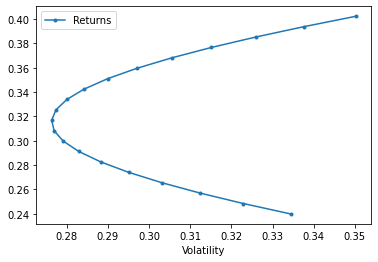

In [24]:
#Determina o número de combinações de pesos:
n_pontos = 20

#Cria uma lista de combinações de pesos com uma quantidade de combinações igual a n_pontos:
#Note que a soma dos pesos sempre será igual a 1 (100%)
m_pesos = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_pontos)]

#Cria uma lista de retornos e volatilidades para cada combinação de pesos na lista m_pesos:
rets = [portfolio_return(w, retornos_ann) for w in m_pesos]
vols = [portfolio_vol(w, matcovs)*(252**0.5) for w in m_pesos]

#Adiciona os retornos e volatilidades a um DataFrame e exibe um gráfico com as combinações.
ef = pd.DataFrame({"Returns": rets, "Volatility": vols})
ef.plot.line(x="Volatility", y="Returns", style=".-")

Observe que o ponto na extremidade de cima representa uma carteira apenas com ações da WEGE3, enquanto o ponto na extremidade de baixo representa uma carteira apenas com ações da FLRY3. Conforme mais de uma outra ação vai sendo adicionada, mais a volatilidade diminui, até chegar a seu ponto mínimo.

Uma obervação importante a ser feita é que todos os pontos abaixo do ponto de volatilidade mínima não valem a pena: é possível obter um retorno maior com o mesmo nível de risco, ou até menos risco. O segmento da curva que vai do ponto de volatilidade mínima até a extremidade superior, então, é chamado de fronteira eficiente: qualquer ponto nessa fronteira será o que possibilida o maior retorno para certa quantidade de risco.

As duas principais carteiras que podem ser retiradas da fronteira eficiente são a carteira com mínima volatilidade, que se encontra no vértice, e a carteira com índice sharpe máximo, que vai depender da taxa livre de risco. O modelo de Markowitz também pode ser utilizado com mais de duas ações, o que torna a análise mais complexa.

Experimente agora aplicar o modelo de Markowitz com outras ações!